# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


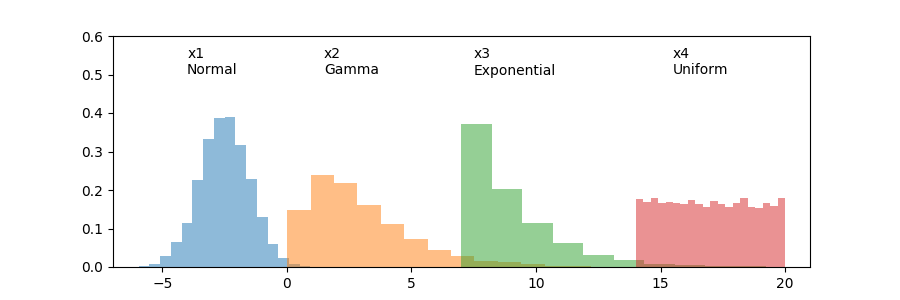

In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


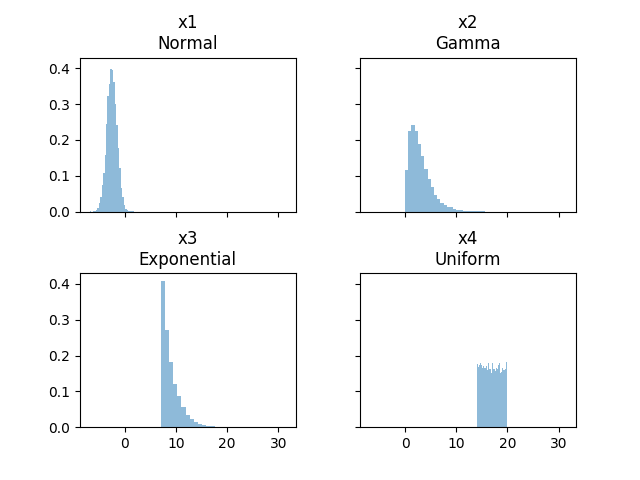

In [15]:
# create 2x2 grid of axis subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True,sharey=True)
axs = [ax1,ax2,ax3,ax4]
samples = [x1,x2,x3,x4]
text = ['x1\nNormal','x2\nGamma', 'x3\nExponential', 'x4\nUniform']
for n in range(0,len(axs)):
    axs[n].hist(samples[n], normed=True, bins=30, alpha=0.5)
    axs[n].set_title(text[n])
fig.subplots_adjust(hspace=0.4,wspace=0.3)

<IPython.core.display.Javascript object>


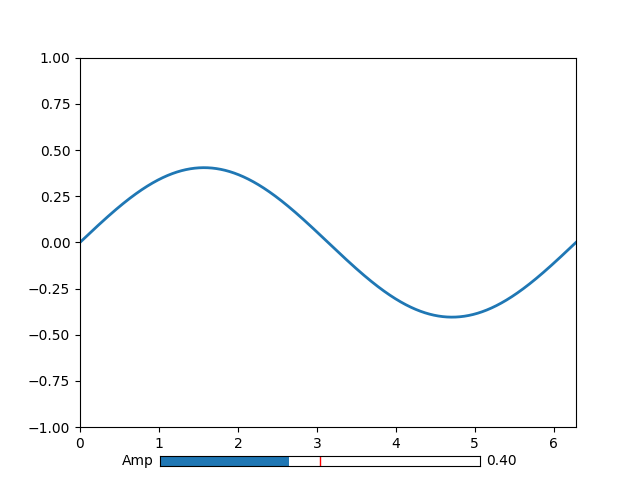

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.widgets import Slider

TWOPI = 2*np.pi

fig, ax = plt.subplots()

t = np.arange(0.0, TWOPI, 0.001)
initial_amp = .5
s = initial_amp*np.sin(t)
l, = plt.plot(t, s, lw=2)

ax = plt.axis([0,TWOPI,-1,1])

axamp = plt.axes([0.25, .03, 0.50, 0.02])
# Slider
samp = Slider(axamp, 'Amp', 0, 1, valinit=initial_amp)

# Animation controls
is_manual = False # True if user has taken control of the animation
interval = 100 # ms, time between animation frames
loop_len = 5.0 # seconds per loop
scale = interval / 1000 / loop_len

def update_slider(val):
    global is_manual
    is_manual=True
    update(val)

def update(val):
    # update curve
    l.set_ydata(val*np.sin(t))
    # redraw canvas while idle
    fig.canvas.draw_idle()

def update_plot(num):
    global is_manual
    if is_manual:
        return l, # don't change

    val = (samp.val + scale) % samp.valmax
    samp.set_val(val)
    is_manual = False # the above line called update_slider, so we need to reset this
    return l,

def on_click(event):
    # Check where the click happened
    (xm,ym),(xM,yM) = samp.label.clipbox.get_points()
    if xm < event.x < xM and ym < event.y < yM:
        # Event happened within the slider, ignore since it is handled in update_slider
        return
    else:
        # user clicked somewhere else on canvas = unpause
        global is_manual
        is_manual=False

# call update function on slider value change
samp.on_changed(update_slider)

fig.canvas.mpl_connect('button_press_event', on_click)

ani = animation.FuncAnimation(fig, update_plot, interval=interval)

plt.show()

<IPython.core.display.Javascript object>


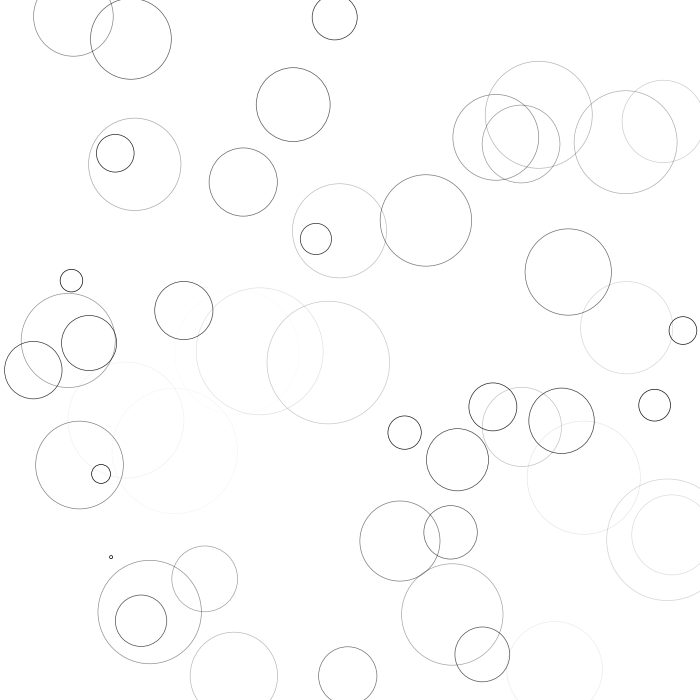

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Fixing random state for reproducibility
np.random.seed(19680801)


# Create new Figure and an Axes which fills it.
fig = plt.figure(figsize=(7, 7))
ax = fig.add_axes([0, 0, 1, 1], frameon=False)
ax.set_xlim(0, 1), ax.set_xticks([])
ax.set_ylim(0, 1), ax.set_yticks([])

# Create rain data
n_drops = 50
rain_drops = np.zeros(n_drops, dtype=[('position', float, 2),
                                      ('size',     float, 1),
                                      ('growth',   float, 1),
                                      ('color',    float, 4)])

# Initialize the raindrops in random positions and with
# random growth rates.
rain_drops['position'] = np.random.uniform(0, 1, (n_drops, 2))
rain_drops['growth'] = np.random.uniform(50, 200, n_drops)

# Construct the scatter which we will update during animation
# as the raindrops develop.
scat = ax.scatter(rain_drops['position'][:, 0], rain_drops['position'][:, 1],
                  s=rain_drops['size'], lw=0.5, edgecolors=rain_drops['color'],
                  facecolors='none')


def update(frame_number):
    # Get an index which we can use to re-spawn the oldest raindrop.
    current_index = frame_number % n_drops

    # Make all colors more transparent as time progresses.
    rain_drops['color'][:, 3] -= 1.0/len(rain_drops)
    rain_drops['color'][:, 3] = np.clip(rain_drops['color'][:, 3], 0, 1)

    # Make all circles bigger.
    rain_drops['size'] += rain_drops['growth']

    # Pick a new position for oldest rain drop, resetting its size,
    # color and growth factor.
    rain_drops['position'][current_index] = np.random.uniform(0, 1, 2)
    rain_drops['size'][current_index] = 5
    rain_drops['color'][current_index] = (0, 0, 0, 1)
    rain_drops['growth'][current_index] = np.random.uniform(50, 200)

    # Update the scatter collection, with the new colors, sizes and positions.
    scat.set_edgecolors(rain_drops['color'])
    scat.set_sizes(rain_drops['size'])
    scat.set_offsets(rain_drops['position'])


# Construct the animation, using the update function as the animation director.
animation = FuncAnimation(fig, update, interval=10)
plt.show()

In [38]:
import math
import numpy as np

def py_bivariate_normal_pdf(domain, mean, variance):
    X = [[-mean+x*variance for x in range(int((-domain+mean)//variance), 
                                                   int((domain+mean)//variance)+1)] 
                  for _ in range(int((-domain+mean)//variance), 
                                 int((domain+mean)//variance)+1)]
    Y = [*map(list, zip(*X))]
    R = [[math.sqrt(a**2 + b**2) for a, b in zip(c, d)] for c, d in zip(X, Y)]
    Z = [[(1. / math.sqrt(2 * math.pi)) * math.exp(-.5*r**2) for r in r_sub] for r_sub in R]
    X = [*map(lambda a: [b+mean for b in a], X)]
    Y = [*map(lambda a: [b+mean for b in a], Y)]
    return  np.array(X), np.array(Y), np.array(Z)

In [39]:
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

def plt_plot_bivariate_normal_pdf(x, y, z):
  fig = plt.figure(figsize=(6, 3))
  ax = fig.gca(projection='3d')
  ax.plot_surface(x, y, z, 
                  cmap=cm.coolwarm,
                  linewidth=0, 
                  antialiased=True)
  ax.set_xlabel('x')
  ax.set_ylabel('y')
  ax.set_zlabel('z');
  plt.show()

<IPython.core.display.Javascript object>


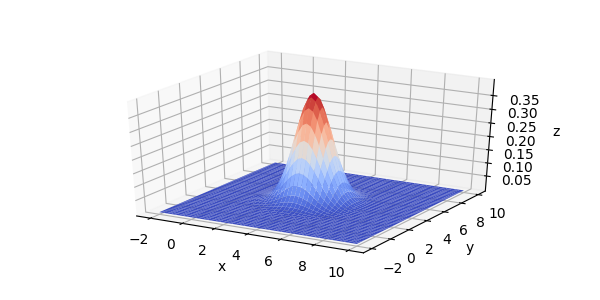

In [40]:
plt_plot_bivariate_normal_pdf(*py_bivariate_normal_pdf(6, 4, .25))